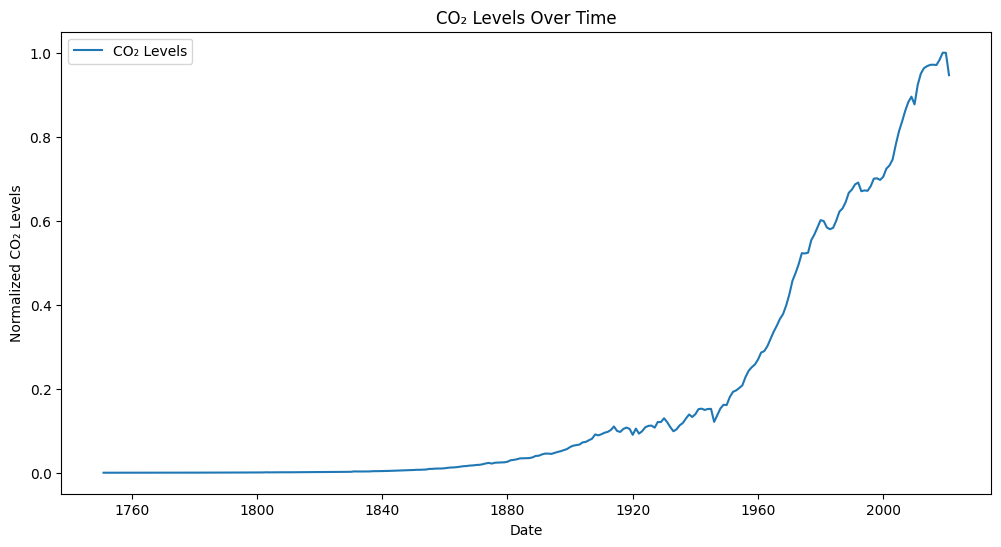

In [ ]:
!pip install tensorflow matplotlib pandas scikit-learn --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

file_path = 'global_dataset.csv'
data = pd.read_csv(file_path)


data = data.drop(columns=['Unnamed: 0'])
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

scaler = MinMaxScaler()
data['co2'] = scaler.fit_transform(data[['co2']])

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['co2'], label='CO₂ Levels')
plt.title('CO₂ Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized CO₂ Levels')
plt.legend()
plt.show()



In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data['scaled_co2'] = scaler.fit_transform(data[['co2']])

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 12
X, y = create_sequences(data['scaled_co2'].values, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.1019 - val_loss: 0.0317
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0263 - val_loss: 0.0203
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0140 - val_loss: 0.0031
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0058 - val_loss: 0.0025
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0016 - val_loss: 9.9772e-04
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0014 - va

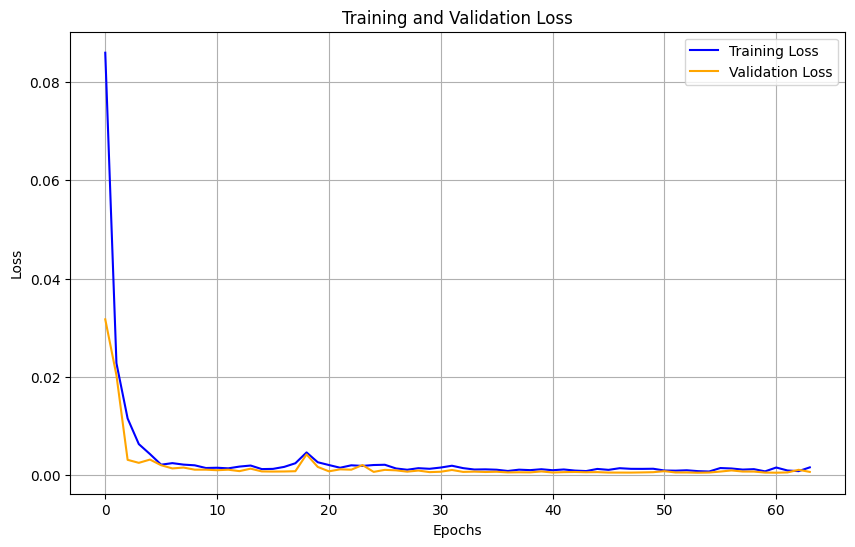

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mean Absolute Error (MAE): 0.01
Root Mean Squared Error (RMSE): 0.02
R² Score: 1.00


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(X_test)

y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")




<ipython-input-23-24b6defe8e7a>:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=data.index[-1], periods=11, freq='Y')[1:]  # Create future years


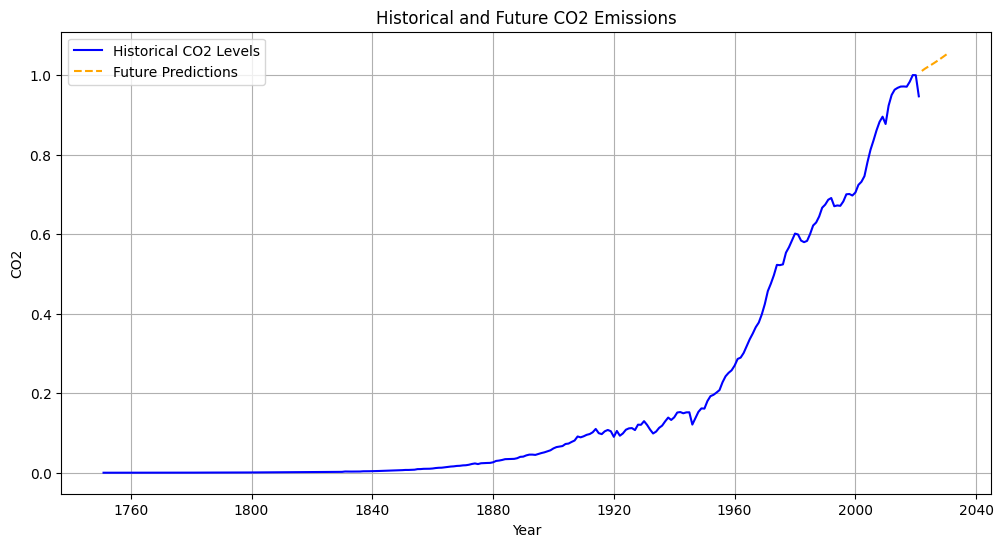

In [ ]:
def forecast_future(data, model, scaler, steps, sequence_length):
    predictions = []
    current_sequence = data[-sequence_length:]

    for _ in range(steps):
        current_sequence = current_sequence.reshape((1, sequence_length, 1))
        next_value = model.predict(current_sequence, verbose=0)
        predictions.append(next_value[0, 0])

        current_sequence = np.append(current_sequence[:, 1:, :], [[[next_value[0, 0]]]], axis=1)

    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

future_predictions = forecast_future(data['scaled_co2'].values, model, scaler, steps=10, sequence_length=sequence_length)

plt.figure(figsize=(12, 6))
future_years = pd.date_range(start=data.index[-1], periods=11, freq='Y')[1:]
plt.plot(data.index, data['co2'], label='Historical CO2 Levels', color='blue')
plt.plot(future_years, future_predictions, label='Future Predictions', linestyle='dashed', color='orange')
plt.title('Historical and Future CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install plotly --quiet

import plotly.graph_objects as go
import pandas as pd

future_years_full = pd.date_range(start='2021', end='2100', freq='Y').year
all_years_full = list(historical_years) + list(future_years_full)

future_co2_full = forecast_future(data['scaled_co2'].values, model, scaler, steps=len(future_years_full), sequence_length=sequence_length).flatten().tolist()
all_co2_full = historical_co2 + future_co2_full

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=historical_years,
    y=historical_co2,
    mode='lines+markers',
    name='Historical CO2',
    line=dict(color='blue'),
    marker=dict(size=6)
))

fig.add_trace(go.Scatter(
    x=future_years_full,
    y=future_co2_full,
    mode='lines+markers',
    name='Future Predictions',
    line=dict(color='orange', dash='dot'),
    marker=dict(size=6)
))

fig.update_layout(
    title='CO2 Emissions Over Time',
    xaxis=dict(
        title='Year',
        tickmode='array',
        tickvals=list(range(1750, 2101, 50)),
        ticktext=[str(year) for year in range(1750, 2101, 50)],
        range=[1750, 2100]
    ),
    yaxis=dict(
        title='CO2 Emissions (Million Tonnes)'
    ),
    hovermode='x',
    template='plotly_white'
)

fig.update_traces(
    hovertemplate='Year: %{x}<br>CO2: %{y:.2f} Million Tonnes'
)

fig.show()


<ipython-input-25-6224a5024856>:8: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

